In [2]:
##load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from io import BytesIO
from google.cloud import storage

In [3]:
##connect to training dataset
storage_client = storage.Client()
bucket = storage_client.get_bucket('mlops_model_input')
file = '/data_input/Taxi_Trips_3mo.csv'
blob = bucket.blob(file)
path = "gs://mlops_model_input" + file
df = pd.read_csv(path)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(df.head())
##check dimensions of imported file
rows = df.shape[0]
cols = df.shape[1]
print(rows)
print(cols)
print(df.dtypes)


                                    Trip ID  \
0  3e1ac82501797e2e6cd020d2eb6a47774add503f   
1  3adf277e43154ac0cd099c7bb7137f75dcfded95   
2  352e025da59c35567204a5025d0a7ebbb41e7e93   
3  3276bc172c61ea58ce803d2f34611f6c074c14f1   
4  46e7d47c11aa83bc3488d7df84f901a92b961461   

                                             Taxi ID    Trip Start Timestamp  \
0  51e37146cd6467734e50a00ffe2ebbb77ee35e5f207817...  01/01/2021 12:15:00 AM   
1  d24314a66ebc6319a50cc335d6896612b845ca15f702ee...  01/01/2021 12:15:00 AM   
2  67d5ca2736337fa9f349db0f29887fe290c0cd84263055...  01/01/2021 12:15:00 AM   
3  35057a271731c5b976bda25efe85aa0c1901d0a5fc9ba2...  01/01/2021 12:15:00 AM   
4  19e804a8eab9224b352e6a384007418b519864a3e7c2d9...  01/01/2021 12:15:00 AM   

       Trip End Timestamp Trip Seconds  Trip Miles  Pickup Census Tract  \
0  01/01/2021 12:30:00 AM        1,140         6.4                  NaN   
1  01/01/2021 12:15:00 AM          420         1.3                  NaN   
2  01/01/20

In [5]:
##null and missing value handling by removing null values
SELECTED_COLUMNS = ['Company','Pickup Community Area', 'Dropoff Community Area', 'Trip Seconds', 'Trip Miles']
print(df.isnull().sum())
df_filtered = df.dropna(axis=0, subset = SELECTED_COLUMNS) ##remove any rows with missing values
print(df_filtered.head())
print(df_filtered.shape[0])
print(df_filtered.shape[1])

Trip ID                            0
Taxi ID                          111
Trip Start Timestamp               0
Trip End Timestamp                94
Trip Seconds                     274
Trip Miles                         2
Pickup Census Tract           458925
Dropoff Census Tract          461650
Pickup Community Area          36709
Dropoff Community Area         60140
Fare                              59
Tips                              59
Tolls                             59
Extras                            59
Trip Total                        59
Payment Type                       0
Company                            0
Pickup Centroid Latitude       36571
Pickup Centroid Longitude      36571
Pickup Centroid Location       36571
Dropoff Centroid Latitude      59493
Dropoff Centroid Longitude     59493
Dropoff Centroid  Location     59493
dtype: int64
                                    Trip ID  \
0  3e1ac82501797e2e6cd020d2eb6a47774add503f   
1  3adf277e43154ac0cd099c7bb7137f75dcfded9

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


427073
23


,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,3e1ac82501797e2e6cd020d2eb6a47774add503f,51e37146cd6467734e50a00ffe2ebbb77ee35e5f207817...,01/01/2021 12:15:00 AM,01/01/2021 12:30:00 AM,1140,6.40,NaN,NaN,28.0,6.0,...,0.0,25.35,Credit Card,Medallion Leasin,41.874005,-87.663518,POINT (-87.6635175498 41.874005383),41.944227,-87.655998,POINT (-87.6559981815 41.9442266014)
1,3adf277e43154ac0cd099c7bb7137f75dcfded95,d24314a66ebc6319a50cc335d6896612b845ca15f702ee...,01/01/2021 12:15:00 AM,01/01/2021 12:15:00 AM,420,1.30,NaN,NaN,8.0,8.0,...,0.0,7.00,Cash,Top Cab Affiliation,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,352e025da59c35567204a5025d0a7ebbb41e7e93,67d5ca2736337fa9f349db0f29887fe290c0cd84263055...,01/01/2021 12:15:00 AM,01/01/2021 12:30:00 AM,660,4.70,NaN,NaN,7.0,3.0,...,0.0,14.25,Cash,Medallion Leasin,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,46e7d47c11aa83bc3488d7df84f901a92b961461,19e804a8eab9224b352e6a384007418b519864a3e7c2d9...,01/01/2021 12:15:00 AM,01/01/2021 12:15:00 AM,199,1.10,NaN,NaN,14.0,13.0,...,0.0,5.75,Cash,Medallion Leasin,41.968069,-87.721559,POINT (-87.7215590627 41.968069),41.983636,-87.723583,POINT (-87.7235831853 41.9836363072)
5,68104156c9b7adfa21d0ae6293bad7fc2dd66e7c,2780ead18beaa862cc67315ddabd9d1acaadcd6da82eba...,01/01/2021 12:15:00 AM,01/01/2021 12:30:00 AM,741,1.85,NaN,NaN,2.0,1.0,...,0.0,9.25,Prcard,Flash Cab,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.009623,-87.670167,POINT (-87.6701668569 42.0096228806)


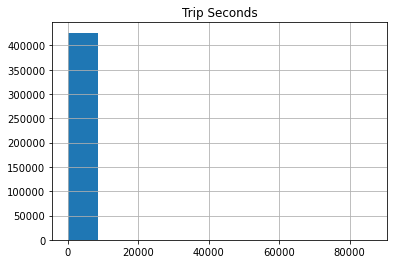

In [6]:
##histogram of dependent variable
#df["Trip Seconds"]=df["Trip Seconds"].astype(int)
df_filtered['Trip Seconds'] = df_filtered['Trip Seconds'].str.replace(',','').astype(int)
##remove observations with 0 trip seconds
df_filtered =df_filtered[df_filtered['Trip Seconds'] !=0]
df_filtered.hist(column='Trip Seconds')
print(df_filtered.shape[0])
print(df_filtered.shape[1])
df_filtered.head()

In [13]:
## create our training data sets with the independent vars. 
## X = Independent Vars: taxi cab company, pickup community area, and drop off community 
## Y = Var we are trying to predict : trip time in seconds

X_run_cols = df_filtered.columns.str.contains("pickup community area|dropoff community area|trip miles", case = False)
Y_col = df_filtered.columns.str.contains("trip seconds", case = False)
print(X_run_cols)
print(Y_col)
X = df_filtered.iloc[:, X_run_cols]
Y = df_filtered.iloc[:, Y_col]
print(X.head())
print(Y.head())


[False False False False False  True False False  True  True False False
 False False False False False False False False False False False]
[False False False False  True False False False False False False False
 False False False False False False False False False False False]
   Trip Miles  Pickup Community Area  Dropoff Community Area
0        6.40                   28.0                     6.0
1        1.30                    8.0                     8.0
2        4.70                    7.0                     3.0
4        1.10                   14.0                    13.0
5        1.85                    2.0                     1.0
   Trip Seconds
0          1140
1           420
2           660
4           199
5           741


In [14]:
from pathlib import Path
import keras
import numpy
import tensorflow as tf

random_seed = 123
tf.random.set_seed(random_seed)
numpy.random.seed(random_seed)


In [15]:
##One step to split the original dataset in training and validation sets by random sampling
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

In [16]:
from tensorflow import keras
model = keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(keras.layers.Dense(64, activation='relu'))

In [17]:
# Adam optimizer
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.99, epsilon=1e-05, amsgrad=False,
    name='Adam')
  
# Model compiling settings
model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])

In [18]:
# A mechanism that stops training if the validation loss is not improving for more than n_idle_epochs.
import numpy as np
n_idle_epochs = 100
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=n_idle_epochs, min_delta=0.01)

# Creating a custom callback to print the log after a certain number of epochs
class NEPOCHLogger(tf.keras.callbacks.Callback):
    def __init__(self,per_epoch=100):
        '''
        display: Number of batches to wait before outputting loss
        '''
        self.seen = 0
        self.per_epoch = per_epoch
    
    def on_epoch_end(self, epoch, logs=None):
      if epoch % self.per_epoch == 0:
        print('Epoch {}, loss {:.2f}, val_loss {:.2f}, mae {:.2f}, val_mae {:.2f}, mse {:.2f}, val_mse {:.2f}'\
              .format(epoch, logs['loss'], logs['val_loss'],logs['mae'], logs['val_mae'],logs['mse'], logs['val_mse']))
        
# Call the object
log_display = NEPOCHLogger(per_epoch=100)

# Training loop
n_epochs = 2000
history = model.fit(np.asarray(x_train).astype(np.float32), y_train, batch_size=256,
  epochs=n_epochs, validation_split = 0.1, verbose=0, callbacks=[earlyStopping,log_display])

Epoch 0, loss 4311716.00, val_loss 3342610.75, mae 870.77, val_mae 702.24, mse 4311716.00, val_mse 3342610.75
Epoch 100, loss 3622898.00, val_loss 3005174.00, mae 599.55, val_mae 582.55, mse 3622898.00, val_mse 3005174.00
Epoch 200, loss 3621432.50, val_loss 3005484.00, mae 603.88, val_mae 592.01, mse 3621432.50, val_mse 3005484.00
